# Формальные языки

**Формальный язык** — множество конечных слов над конечным алфавитом $\Sigma$. 
Пусть есть некоторое конечно множество символов $\Sigma$, тогда множество $L \in \Sigma^*$ есть формальный язык. 

Над формальными языками можно определить операции:

* $L_1 \cap L_2$
* $L_1 \cup L_2$
* $L_1 \setminus L_2$
* $L_1 \cdot L_2 $ - новый язык, в котором ко всем возможным словам из $L_1$ присоеденены справа слова из $L_2$
* $L^*$ - замыкание клини, $\{\epsilon\} \cup L \cup (L \cdot L) \cup (L \cdot L \cdot L) \cup \cdots$

**Иерархия Хомского** — классификация формальных языков и формальных грамматик, согласно которой они делятся на 4 типа по их условной сложности

**Контекстно-свободная грамматикой**  называется четверка $G = (V, \Sigma, R, S)$, где

- $V$  - конечное множество нетерминальных символов
- $\Sigma$ - конечно множество терминальных символов (алфавит формального языка)
- $R$  - конечное множество правил  вида $V \rightarrow (V \cup \Sigma)^{*}$
- $S \in V$ - начальный нетерминал

### Примеры КС-грамматик

**Язык правильных скобочных записей**

$S \rightarrow (S)S$

$S \rightarrow \epsilon$

Нетерминалы: $\{S\}$, терминалы: $\{(, )\}$, начальный нетерминал: $S$

**Математические выражения**

$S \rightarrow S + P\,|\,S - P\,|\,P$

$P \rightarrow A\,|\,P \cdot A\,|\,P / A$

$A \rightarrow  \mathbb{num}|\,(S)$

Нетерминалы: $\{S, P, A\}$, терминалы: $\{(, ), \mathbb{num}\}$, начальный нетерминал: $S$


### Разбор КС-грамматик

Задача алгоритма разбора: по заданной грамматике и строке определить, принадлежит ли строка языку, порождаемому этой грамматикой, и построить дерево разбора

Существуют различные типы КС-грамматик:
- $LL$ 
- $LALR$
- $SLR$
- $LR$

Распознаватели строятся по алгоритмам оптимальным для соответствующего типа (применяются при разборе языков программирования). Разбор входной строки обычно идет слева направо, дерево вывода может строиться сверху вниз или снизу вверх.

Любая КС-грамматика может быть преобразована к эквивалентной грамматике к нормальной форме Хомского. Грамматика имеет вид нормальной формы Хомского, если ее правила имеют вид:

$\: A \rightarrow BC$ 

$\: A \rightarrow \alpha$ 

$\: S \rightarrow \epsilon$

**Алгоритм Кока — Янгера — Касами (CYK)** - алгоритм синтаксического анализа статьи, реализует вывод снизу-вверх, используется динамическое программирование. Сложность - $\mathcal{O}\left( n^3 \cdot \left| R \right| \right)$, где $n$ - размер строки, $R$ - правила грамматики в нормально форме Хомского.

Идея: пусть входная строк $w$. Строится таблица $d[A][i][j]$ с данными о возможности вывода  $w[i..j]$ из правила $A$.

**Алгоритм Эрли** - динамический алгоритм, строит вывод сверху вниз. Не требует преобразования к нормальной форме Хомского.

### Иерархия Хомского

 Классификация формальных грамматик (и, соответственно, порождаемых ими языков), согласно которой они делятся на 4 типа, в зависимости от их  сложности. Предложена лингвистом Ноамом Хомским. 

 #### Тип 3 — регулярные
 Сюда входят регулярные языки.  Регулярный язык (помимо регулярных выражений, конечных автоматов) можно задать с помощью КС-грамматик, где продукции выглядят так: $A \rightarrow a$ или $A \rightarrow aB$

#### Тип 2 — контекстно-свободные
Контекстно свободные грамматики и порождаемые ими языки

#### Тип 1 — контекстно-зависимые
Контекстно зависимые грамматики и порождаемые ими языки. Правила выводы выглядят так $\alpha A \beta \rightarrow \alpha \gamma \beta$

#### Тип 0 — неограниченные
Нет никаких ограничений

## Библиотека [LARK](https://github.com/lark-parser/)

Библиотека синтаксического разбора для `Python`. Реализует алгоритм Эрли и $LALR(1)$  

In [1]:
from lark import Lark, Tree


calc_grammar = """
    ?start: sum

    ?sum: product
        | sum "+" product   -> add
        | sum "-" product   -> sub

    ?product: atom
        | product "*" atom  -> mul
        | product "/" atom  -> div

    ?atom: NUMBER           -> number
         | "(" sum ")"

    %import common.CNAME -> NAME
    %import common.NUMBER
    %import common.WS_INLINE

    %ignore WS_INLINE
"""

calc_parser = Lark(calc_grammar, parser='lalr')
tree = calc_parser.parse("(1 + 2) * 5 + 123")

def calc(tree: Tree) -> int:
    match tree.data:
        case "mul":
            return calc(tree.children[0]) * calc(tree.children[1])
        case "sub":
            return calc(tree.children[0]) - calc(tree.children[1])
        case "add":
            return calc(tree.children[0]) + calc(tree.children[1])
        case "div":
            return calc(tree.children[0]) / calc(tree.children[1])
        case "number":
            return int(tree.children[0])

calc(tree)
##print(tree)

138

### [Pyparsing](https://github.com/pyparsing/pyparsing/)

Ещё одна библиотека синтаксического разбора для `Python`. Грамматика описывается с помощью специального DSL (domain-specific language, предметно-ориентированный язык).

Опишем грамматику, котора позволяет разобрать записи вида: 
>   <слово>: число, число, ...

In [2]:
from pyparsing import Word, alphas, nums,  Literal, StringEnd, ZeroOrMore, Suppress, OneOrMore 

word = Word(alphas)
num = Word(nums)
sep = Suppress(OneOrMore(','))
col = Suppress(':')

s = word + col + num + ZeroOrMore(sep + num) + StringEnd()
        
s.parseString('hello: 1, 22, 3')

ParseResults(['hello', '1', '22', '3'], {})

Более сложный пример, грамматика описывает правильные скобочные записи.

In [3]:
from pyparsing import Literal, Forward, StringEnd, OneOrMore, Empty

br_o = Literal('(')
br_c = Literal(')')

braces = Forward()
braces << OneOrMore(br_o + (braces | Empty() ) + br_c)
start = braces + StringEnd()
        
start.parseString('(())()()')

ParseResults(['(', '(', ')', ')', '(', ')', '(', ')'], {})

### [YARGY](https://github.com/natasha/yargy)

Библиотека для извлечения структурированных данных из текста на русском языке. Аналог [Tomita Parser](https://github.com/yandex/tomita-parser/).

Для разбора текста используется алгоритм Эрли и Pymorphy2 для работы с морфологией.

Напишем простую грамматику для поиска упоминаний улиц.

['Таврической', 'улицы']


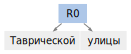

['Первой', 'Большой', 'Рождественской', 'улицы']


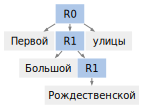

['Мариинский', 'проезд']


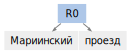

In [4]:
from yargy import Parser, rule, and_, or_
from yargy.predicates import gram, is_capitalized, dictionary


ST = rule(
    and_(
        gram('ADJF'),  
        is_capitalized()
    ),
    gram('ADJF').optional().repeatable(),
    dictionary({
        "улица",
        "переулок",
        "проезд"
    })
)


text = "Я шел по городу от Таврической улицы и в итоге дошел до Первой Большой Рождественской улицы. Мариинский проезд остался позади."  
parser = Parser(ST)
for match in parser.findall(text):
    print([_.value for _ in match.tokens])
    display(match.tree.as_dot)

Более сложные грамматики для определения адресов и других именованных сущностей есть в библиотеке [Natasha](https://github.com/natasha/natasha/blob/master/natasha/grammars/addr.py).

В результате работы парсера мы получаем дерево разбора. Иногда удобнее сразу интерпретировать узлы дерева в качестве объектов - фактов. Например, мы хотим извлечь данные о занимаемой должности и имени. 

In [5]:
from yargy import Parser
from yargy.predicates import gram
from yargy.pipelines import morph_pipeline
from yargy.interpretation import fact
from yargy.relations import gnc_relation

Person = fact(
    "Person",
    ["position", "name"]
)
Name = fact(
    "Name",
    ["first", "last"]
)

gnc = gnc_relation()

POSITION = morph_pipeline([
    "директор",
    "руководитель"
])

ORG = morph_pipeline([
    "фирма",
    "предприятие"
])

NAME = rule(
    gram("Name").interpretation(
        Name.first.inflected()
    ),
    gram("Surn").interpretation(
        Name.last.inflected()
    )
).interpretation(
    Name
)

PERSON = rule(
    POSITION.interpretation(
        Person.position.inflected()
    ),
    ORG,
    NAME.interpretation(
        Person.name
    )
).interpretation(
    Person
)


parser = Parser(PERSON)
text = "Руководителя предприятия Антона Иванова поздравил коллектив с праздником."
for match in parser.findall(text):
    print(match.fact)

Person(position='руководитель', name=Name(first='антон', last='иванов'))


Иногда в правилах нужно иметь согласование по роду, числу или падежу:

In [6]:
from yargy.relations import gnc_relation

NAME = rule(
    gram("Name"),
    gram("Surn")
)

parser = Parser(NAME)
for match in parser.findall("Петру Марков, Петр Марков"):
    print([_.value for _ in match.tokens])

['Петру', 'Марков']
['Петр', 'Марков']


в этом случае можно использовать `gnc_relation()`

In [7]:
gnc = gnc_relation()

NAME = rule(
    gram("Name").match(gnc),
    gram("Surn").match(gnc)
)


parser = Parser(NAME)
for match in parser.findall("Петру Маркову, Петр Марков"):
    print([_.value for _ in match.tokens])

['Петру', 'Маркову']
['Петр', 'Марков']


Реализуем простую грамматику, для извлечения данных вида: человек $\rightarrow$ окончил такой-то университет

In [8]:
Person = fact(
    "Person",
    ["first", "last"]
)

EduOrg = fact(
    "EduOrg",
    ["name"]
)

Entry = fact(
    "Entry",
    ["person", "edu_org"]
)

gnc = gnc_relation()

NAME = rule(
    is_capitalized().match(gnc).interpretation(Person.first.inflected()).optional(),
    is_capitalized().match(gnc).interpretation(Person.last.inflected()),
).interpretation(
    Person
)

GRAD_VERB = morph_pipeline([
    "окончил",
    "закончил",
    "выпустился из", 
    "окончил"
])

EDU_ORG_TAG = morph_pipeline([
    "университет", 
    "институт",
    "училище",
    "техникум",
    "военный институт"
])

EDU_ORG_FULL_NAME = rule(
    gram("ADJF"),
    gram("ADJF").optional().repeatable(),
    EDU_ORG_TAG
)

EDU_ORG_ABBR = rule(
    gram("Abbr")
)

EDU_ORG_CITY = rule(
    EDU_ORG_TAG,
    gram("NOUN").optional().repeatable(),
    and_(
        is_capitalized(),
        gram("NOUN")
    )
)

EDU_ORG = rule(
    or_(
        EDU_ORG_FULL_NAME,
        EDU_ORG_ABBR,
        EDU_ORG_CITY
    )
).interpretation(EduOrg.name)   

S = rule(
    NAME.interpretation(Entry.person),
    GRAD_VERB,
    EDU_ORG.interpretation(Entry.edu_org)
).interpretation(Entry)

text = "Владимир Иванов окончил СПБГУ"

parser = Parser(S)
for match in parser.findall(text):
    print(match.fact)
    #print([_.value for _ in match.tokens])
    #display(match.tree.as_dot)

Entry(person=Person(first='владимир', last='иванов'), edu_org='СПБГУ')


Применим на коллекции новостных документов

In [9]:
import gzip

from dataclasses import dataclass
from typing import Iterator

@dataclass
class Text:
    label: str
    title: str
    text: str


def read_texts(fn: str) -> Iterator[Text]:
    with gzip.open(fn, "rt", encoding="utf-8") as f:
        for line in f:
            yield Text(*line.strip().split("\t"))

texts = list(read_texts("data/news.txt.gz"))

In [11]:
from tqdm import tqdm 

for text in tqdm(texts, disable=True):
    try:
        for match in parser.findall(text.text):
         print(match.fact)
    except:
       # empty
       pass



Entry(person=Person(first='дмитрий', last='циликин'), edu_org='Ленинградский государственный институт')
Entry(person=Person(first=None, last='янина'), edu_org='Высшее театральное училище')
Entry(person=Person(first=None, last='самойлов'), edu_org='театральное училище')
Entry(person=Person(first=None, last='людомирский'), edu_org='МГТУ')
Entry(person=Person(first=None, last='шевченко'), edu_org='Луганское художественное училище')
